In [1]:
nombre = "Madrigal Urencio Ricardo \n"

In [2]:
#Librerias a Importar
from pyspark.sql.functions import col, sum, to_date, to_timestamp, regexp_replace
from pyspark.sql.functions import date_format
from pyspark.sql.types import IntegerType, DoubleType, FloatType, StructType, StructField, StringType
from pyspark.sql.functions import hour, minute, second, year, month, dayofmonth, weekofyear
from pyspark.sql.functions import monotonically_increasing_id
import matplotlib.pyplot as plt

In [3]:
#Cargar los datos en Spark

In [4]:
dir_hdfs = "hdfs://namenode:9000/tmp/amd/proyecto/atus"
df = spark.read.csv(dir_hdfs, header = True, inferSchema = True)

print(nombre)
df.printSchema()
print(df.count())

Madrigal Urencio Ricardo 

root
 |-- COBERTURA: string (nullable = true)
 |-- ID_ENTIDAD: double (nullable = true)
 |-- ID_MUNICIPIO: double (nullable = true)
 |-- ANIO: double (nullable = true)
 |-- MES: double (nullable = true)
 |-- ID_HORA: double (nullable = true)
 |-- ID_MINUTO: double (nullable = true)
 |-- ID_DIA: double (nullable = true)
 |-- DIASEMANA: string (nullable = true)
 |-- URBANA: string (nullable = true)
 |-- SUBURBANA: string (nullable = true)
 |-- TIPACCID: string (nullable = true)
 |-- AUTOMOVIL: integer (nullable = true)
 |-- CAMPASAJ: integer (nullable = true)
 |-- MICROBUS: integer (nullable = true)
 |-- PASCAMION: integer (nullable = true)
 |-- OMNIBUS: integer (nullable = true)
 |-- TRANVIA: integer (nullable = true)
 |-- CAMIONETA: integer (nullable = true)
 |-- CAMION: integer (nullable = true)
 |-- TRACTOR: integer (nullable = true)
 |-- FERROCARRI: integer (nullable = true)
 |-- MOTOCICLET: integer (nullable = true)
 |-- BICICLETA: integer (nullable = tru

In [5]:
#Verificar si existen Nulos
print(nombre)

df.select([sum(col(c).isNull().cast("int")).alias(c) for c in df.columns]).show()

Madrigal Urencio Ricardo 

+---------+----------+------------+----+---+-------+---------+------+---------+------+---------+--------+---------+--------+--------+---------+-------+-------+---------+------+-------+----------+----------+---------+---------+---------+-------+----+-------+--------+-------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+--------+--------+-------+-------+
|COBERTURA|ID_ENTIDAD|ID_MUNICIPIO|ANIO|MES|ID_HORA|ID_MINUTO|ID_DIA|DIASEMANA|URBANA|SUBURBANA|TIPACCID|AUTOMOVIL|CAMPASAJ|MICROBUS|PASCAMION|OMNIBUS|TRANVIA|CAMIONETA|CAMION|TRACTOR|FERROCARRI|MOTOCICLET|BICICLETA|OTROVEHIC|CAUSAACCI|CAPAROD|SEXO|ALIENTO|CINTURON|ID_EDAD|CONDMUERTO|CONDHERIDO|PASAMUERTO|PASAHERIDO|PEATMUERTO|PEATHERIDO|CICLMUERTO|CICLHERIDO|OTROMUERTO|OTROHERIDO|NEMUERTO|NEHERIDO|CLASACC|ESTATUS|
+---------+----------+------------+----+---+-------+---------+------+---------+------+---------+--------+---------+--------+--------+--

In [6]:
df.select(['COBERTURA', 'ID_ENTIDAD', 'ID_HORA', 'ID_MINUTO', 'ID_DIA', 'MES', 'DIASEMANA', 'ANIO']).show(10, truncate = False)

+---------+----------+-------+---------+------+---+---------+------+
|COBERTURA|ID_ENTIDAD|ID_HORA|ID_MINUTO|ID_DIA|MES|DIASEMANA|ANIO  |
+---------+----------+-------+---------+------+---+---------+------+
|Municipal|1.0       |0.0    |0.0      |1.0   |1.0|lunes    |2007.0|
|Municipal|1.0       |2.0    |2.0      |1.0   |1.0|lunes    |2007.0|
|Municipal|1.0       |4.0    |55.0     |1.0   |1.0|lunes    |2007.0|
|Municipal|1.0       |5.0    |0.0      |1.0   |1.0|lunes    |2007.0|
|Municipal|1.0       |5.0    |30.0     |1.0   |1.0|lunes    |2007.0|
|Municipal|1.0       |5.0    |30.0     |1.0   |1.0|lunes    |2007.0|
|Municipal|1.0       |7.0    |45.0     |1.0   |1.0|lunes    |2007.0|
|Municipal|1.0       |13.0   |5.0      |1.0   |1.0|lunes    |2007.0|
|Municipal|1.0       |16.0   |35.0     |1.0   |1.0|lunes    |2007.0|
|Municipal|1.0       |17.0   |40.0     |1.0   |1.0|lunes    |2007.0|
+---------+----------+-------+---------+------+---+---------+------+
only showing top 10 rows



In [7]:
#Limpieza del esquema
import pyspark.sql.functions as F
print(nombre)

datos = df\
.withColumn("ID_ENTIDAD", col("ID_ENTIDAD").cast(IntegerType())) \
.withColumn("ID_MUNICIPIO", col("ID_MUNICIPIO").cast(IntegerType())) \
.withColumn("ANIO", col("ANIO").cast(IntegerType())) \
.withColumn("MES", col("MES").cast(IntegerType())) \
.withColumn("ID_HORA", col("ID_HORA").cast(IntegerType())) \
.withColumn("ID_MINUTO", col("ID_MINUTO").cast(IntegerType())) \
.withColumn("ID_DIA", col("ID_DIA").cast(IntegerType())) \
.withColumn("HORA", F.concat(F.lpad(F.col("ID_HORA").cast(IntegerType()), 2, "0"), F.lit(":"), F.lpad(F.col("ID_MINUTO").cast(IntegerType()), 2, "0"), F.lit(":00"))) \
.withColumn("HORA", date_format(col("HORA"), "HH:mm:ss")) \
.withColumn("FECHA", F.concat(F.lpad(F.col("ID_DIA").cast(IntegerType()), 2, "0"), F.lit("/"), F.lpad(F.col("MES").cast(IntegerType()), 2, "0"), F.lit("/"), F.col("ANIO").cast(IntegerType()))) \
.withColumn("FECHA", to_date(col("FECHA"), "dd/MM/yyyy"))
datos.show(10, truncate = False)

Madrigal Urencio Ricardo 

+---------+----------+------------+----+---+-------+---------+------+---------+----------------------------+--------------------------+-------------------------------+---------+--------+--------+---------+-------+-------+---------+------+-------+----------+----------+---------+---------+------------------+-----------+------+-------+---------+-------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+--------+--------+----------+----------------+--------+----------+
|COBERTURA|ID_ENTIDAD|ID_MUNICIPIO|ANIO|MES|ID_HORA|ID_MINUTO|ID_DIA|DIASEMANA|URBANA                      |SUBURBANA                 |TIPACCID                       |AUTOMOVIL|CAMPASAJ|MICROBUS|PASCAMION|OMNIBUS|TRANVIA|CAMIONETA|CAMION|TRACTOR|FERROCARRI|MOTOCICLET|BICICLETA|OTROVEHIC|CAUSAACCI         |CAPAROD    |SEXO  |ALIENTO|CINTURON |ID_EDAD|CONDMUERTO|CONDHERIDO|PASAMUERTO|PASAHERIDO|PEATMUERTO|PEATHERIDO|CICLMUERTO|CICLHERIDO|OTRO

In [8]:
#Analisis de Datos

In [9]:
#Identificar día de la semana con mayor Número de Accidentes
print(nombre)

datos2 = datos.groupBy("DIASEMANA").count()
datos2.orderBy("count", ascending = False).show()

Madrigal Urencio Ricardo 

+----------------+-------+
|       DIASEMANA|  count|
+----------------+-------+
|         Viernes|1442605|
|         Domingo|1363343|
|          Jueves|1260046|
|          Martes|1239828|
|          Sábado|1129435|
|           Lunes| 932448|
|       Miércoles| 892599|
|           lunes| 448241|
|          Sabado| 435068|
|       Miercoles| 351475|
| No especificado|  33629|
|Certificado cero|  15210|
+----------------+-------+



In [10]:
#Guardar el nuevo DataFrame

print(nombre)

datos2.write.mode("overwrite").option("header", "true").csv("hdfs://namenode:9000/tmp/amd/atus_filtrado")
print("Done")

Madrigal Urencio Ricardo 

Done


In [11]:
#Tablas Temporales

In [12]:
#Generar Tablas SQl
print(nombre)

municipios = spark.read.csv("hdfs://namenode:9000/tmp/amd/proyecto/municipios", header = True, inferSchema = True)
estados = spark.read.csv("hdfs://namenode:9000/tmp/amd/proyecto/estados", header = True, inferSchema = True)
atus_filtrado = spark.read.csv("hdfs://namenode:9000/tmp/amd/atus_filtrado", header = True, inferSchema = True)


datos.createOrReplaceTempView("atus")
municipios.createOrReplaceTempView("municipios")
estados.createOrReplaceTempView("estados")
atus_filtrado.createOrReplaceTempView("atus_filtrado")

spark.sql("show tables").show()

print("atus \n")
spark.sql("describe atus").show(100)
print("estados \n")
spark.sql("describe estados").show()
print("municipios \n")
spark.sql("describe municipios").show()

Madrigal Urencio Ricardo 

+---------+-------------+-----------+
|namespace|    tableName|isTemporary|
+---------+-------------+-----------+
|         |         atus|       true|
|         |atus_filtrado|       true|
|         |      estados|       true|
|         |   municipios|       true|
+---------+-------------+-----------+

atus 

+------------+---------+-------+
|    col_name|data_type|comment|
+------------+---------+-------+
|   COBERTURA|   string|   NULL|
|  ID_ENTIDAD|      int|   NULL|
|ID_MUNICIPIO|      int|   NULL|
|        ANIO|      int|   NULL|
|         MES|      int|   NULL|
|     ID_HORA|      int|   NULL|
|   ID_MINUTO|      int|   NULL|
|      ID_DIA|      int|   NULL|
|   DIASEMANA|   string|   NULL|
|      URBANA|   string|   NULL|
|   SUBURBANA|   string|   NULL|
|    TIPACCID|   string|   NULL|
|   AUTOMOVIL|      int|   NULL|
|    CAMPASAJ|      int|   NULL|
|    MICROBUS|      int|   NULL|
|   PASCAMION|      int|   NULL|
|     OMNIBUS|      int|   NULL|
|

In [13]:
#Consultas y Análisis

In [14]:
#Entidades Federativas con mayor Numero de Accidentes
print(nombre)

sqlstr = """ 
select e.NOM_ENT Estado, count(*) nr
from atus a
left join estados e
on(a.ID_ENTIDAD = e.CVE_ENT)
group by e.NOM_ENT
order by nr desc
"""
spark.sql(sqlstr).show(10, truncate=False)

Madrigal Urencio Ricardo 

+--------------------+-------+
|Estado              |nr     |
+--------------------+-------+
|Nuevo Le�n          |1774611|
|Jalisco             |959558 |
|Chihuahua           |829161 |
|Guanajuato          |437666 |
|Tamaulipas          |426304 |
|Baja California     |407567 |
|Sonora              |392389 |
|Coahuila de Zaragoza|380871 |
|M�xico              |379769 |
|Ciudad de M�xico    |307958 |
+--------------------+-------+
only showing top 10 rows



In [15]:
#Municipio con Mayor Numero de Accidentes
print(nombre)

sqlstr = """ 
select m.NOM_ENT Estado, m.NOM_MUN Municipio, count(*) nr
from atus a
join municipios m
on (a.ID_MUNICIPIO = m.CVE_MUN and a.ID_ENTIDAD = m.CVE_ENT)
group by m.NOM_ENT, m.NOM_MUN
order by nr desc
"""
spark.sql(sqlstr).show(10, truncate=False)

Madrigal Urencio Ricardo 

+---------------+------------------------+------+
|Estado         |Municipio               |nr    |
+---------------+------------------------+------+
|Nuevo Le�n     |Monterrey               |647237|
|Jalisco        |Guadalajara             |426793|
|Chihuahua      |Chihuahua               |325562|
|Nuevo Le�n     |San Nicol�s de los Garza|249571|
|Jalisco        |Zapopan                 |226680|
|Nuevo Le�n     |Guadalupe               |217285|
|Chihuahua      |Ju�rez                  |217130|
|Baja California|Tijuana                 |201335|
|Nuevo Le�n     |San Pedro Garza Garc�a  |196303|
|Quer�taro      |Quer�taro               |178964|
+---------------+------------------------+------+
only showing top 10 rows



In [16]:
#Tipo de Accidentes por Sexo
print(nombre)

sqlstr = """ 
select SEXO, TIPACCID Tipo_Accidente, count(*) nr
from atus
group by TIPACCID, SEXO
order by TIPACCID asc
"""
spark.sql(sqlstr).show(10, truncate=False)

Madrigal Urencio Ricardo 

+----------------+---------------------+------+
|SEXO            |Tipo_Accidente       |nr    |
+----------------+---------------------+------+
|Mujer           |Caída de pasajero    |3982  |
|Hombre          |Caída de pasajero    |47050 |
|Se fugó         |Caída de pasajero    |5706  |
|Certificado cero|Certificado cero     |95839 |
|Se fugó         |Colisión con animal  |3655  |
|Mujer           |Colisión con animal  |2633  |
|Hombre          |Colisión con animal  |29526 |
|Mujer           |Colisión con ciclista|10794 |
|Se fugó         |Colisión con ciclista|15733 |
|Hombre          |Colisión con ciclista|116461|
+----------------+---------------------+------+
only showing top 10 rows



In [17]:
#Tipo de Accidentes por Edad
print(nombre)

sqlstr = """ 
select ID_EDAD Edad, TIPACCID Tipo_Accidente, count(*) nr
from atus
group by TIPACCID, ID_EDAD
order by nr desc
"""
spark.sql(sqlstr).show(10, truncate=False)

Madrigal Urencio Ricardo 

+----+-------------------------------+------+
|Edad|Tipo_Accidente                 |nr    |
+----+-------------------------------+------+
|18  |Colisión con vehículo automotor|692339|
|0   |Colisión con vehículo automotor|469146|
|99  |Colisión con vehículo automotor|422644|
|20  |Colisión con vehículo automotor|237995|
|0   |Colisión con objeto fijo       |204984|
|30  |Colisión con vehículo automotor|175713|
|28  |Colisión con vehículo automotor|168797|
|25  |Colisión con vehículo automotor|166522|
|32  |Colisión con vehículo automotor|161564|
|27  |Colisión con vehículo automotor|157563|
+----+-------------------------------+------+
only showing top 10 rows



In [18]:
#Número de Accidentes por Anio y Mes
print(nombre)

sqlstr = """ 
select YEAR(FECHA) Anio, MONTH(FECHA) Mes, count(*) nr
from atus
group by YEAR(FECHA), MONTH(FECHA)
order by nr desc
"""
spark.sql(sqlstr).show(10, truncate = False)

Madrigal Urencio Ricardo 

+----+----+-----+
|Anio|Mes |nr   |
+----+----+-----+
|NULL|NULL|48839|
|2006|12  |42531|
|2007|3   |41406|
|2007|10  |41159|
|2007|12  |40754|
|2007|6   |40749|
|2007|9   |40720|
|2008|5   |40683|
|2006|10  |40591|
|2005|12  |40584|
+----+----+-----+
only showing top 10 rows



In [19]:
#Número de Accidentes por dia del Mes
print(nombre)

sqlstr = """ 
select month(FECHA) as Mes, day(FECHA) as Dia, count(*) nr
from atus
group by month(FECHA), day(FECHA)
order by nr desc
"""
spark.sql(sqlstr).show(32, truncate = False)

Madrigal Urencio Ricardo 

+----+----+-----+
|Mes |Dia |nr   |
+----+----+-----+
|NULL|NULL|48839|
|12  |15  |37743|
|10  |15  |33921|
|11  |15  |33798|
|2   |28  |33751|
|9   |15  |33696|
|12  |12  |33090|
|10  |28  |32634|
|3   |15  |32573|
|11  |28  |32498|
|6   |15  |32393|
|5   |28  |32341|
|2   |15  |32339|
|8   |28  |32200|
|1   |1   |32183|
|9   |28  |31962|
|3   |28  |31930|
|4   |28  |31890|
|7   |15  |31786|
|8   |15  |31603|
|6   |28  |31594|
|5   |15  |31464|
|1   |28  |31296|
|11  |11  |30739|
|3   |3   |30704|
|1   |15  |30616|
|7   |28  |30392|
|12  |16  |29857|
|6   |6   |29764|
|10  |10  |29718|
|12  |1   |29629|
|3   |1   |29613|
+----+----+-----+
only showing top 32 rows



In [20]:
#Validacion de Fechas Nulas (Anio Mes Dia)
print(nombre)

sqlstr = """ 
select FECHA, ANIO Anio, MES Mes, ID_DIA Dia, count(*) nr
from atus
where(FECHA is null)
group by FECHA, ANIO, MES, ID_DIA
order by nr desc
"""
spark.sql(sqlstr).show(10, truncate = False)

Madrigal Urencio Ricardo 

+-----+----+---+---+----+
|FECHA|Anio|Mes|Dia|nr  |
+-----+----+---+---+----+
|NULL |2010|8  |32 |1766|
|NULL |2018|8  |0  |1297|
|NULL |2018|10 |0  |1286|
|NULL |2018|12 |0  |1283|
|NULL |2018|11 |0  |1282|
|NULL |2018|6  |0  |1267|
|NULL |2018|2  |0  |1265|
|NULL |2018|5  |0  |1261|
|NULL |2018|9  |0  |1261|
|NULL |2010|4  |32 |1258|
+-----+----+---+---+----+
only showing top 10 rows



In [21]:
#Número de Accidentes por Hora
print(nombre)

sqlstr = """ 
select HOUR(HORA) Hora, count(*) nr 
from atus
group by HOUR(HORA)
order by nr desc
"""
spark.sql(sqlstr).show(24, truncate = False)

Madrigal Urencio Ricardo 

+----+------+
|Hora|nr    |
+----+------+
|14  |548223|
|15  |548021|
|18  |542682|
|16  |531547|
|19  |530777|
|17  |521428|
|13  |505200|
|8   |495700|
|12  |486823|
|20  |481555|
|9   |462445|
|11  |445558|
|10  |444936|
|21  |409387|
|23  |383193|
|22  |363040|
|7   |355111|
|0   |352406|
|1   |222876|
|2   |204312|
|6   |195593|
|3   |180086|
|4   |154473|
|5   |143438|
+----+------+
only showing top 24 rows



In [22]:
#Número de Accidentes por Zona
#Accidentes en Zonas Urbanas
print(nombre)

sqlstr = """ 
select URBANA, count(*) nr
from atus
where not (URBANA = "Sin accidente en esta zona")
group by URBANA
order by nr desc
"""
spark.sql(sqlstr).show(10, truncate = False)

Madrigal Urencio Ricardo 

+----------------------------+-------+
|URBANA                      |nr     |
+----------------------------+-------+
|Accidente en intersección   |7049115|
|Accidente en no intersección|1766273|
+----------------------------+-------+



In [23]:
#Accidentes en Zonas Suburbanas
print(nombre)

sqlstr = """ 
select SUBURBANA, count(*) nr
from atus
where not (SUBURBANA = "Sin accidente en esta zona")
group by SUBURBANA
order by nr desc
"""
spark.sql(sqlstr).show(10, truncate = False)

Madrigal Urencio Ricardo 

+------------------------------+------+
|SUBURBANA                     |nr    |
+------------------------------+------+
|Accidente en carretera estatal|435523|
|Accidente en camino rural     |115481|
|Accidentes en otro camino     |81696 |
+------------------------------+------+



In [24]:
#Número de Accidentes por Tipo de Vehiculo y Cantidad de Vehiculos Involucrados
print(nombre)

sqlstr = """ 
select AUTOMOVIL, CAMPASAJ, MICROBUS, PASCAMION, OMNIBUS, TRANVIA, CAMIONETA, 
        CAMION, TRACTOR, FERROCARRI, MOTOCICLET, BICICLETA, OTROVEHIC, count(*) nr
from atus
group by AUTOMOVIL, CAMPASAJ, MICROBUS, PASCAMION, OMNIBUS, TRANVIA, CAMIONETA, 
        CAMION, TRACTOR, FERROCARRI, MOTOCICLET, BICICLETA, OTROVEHIC
order by nr desc
"""
spark.sql(sqlstr).show(20, truncate = False)

Madrigal Urencio Ricardo 

+---------+--------+--------+---------+-------+-------+---------+------+-------+----------+----------+---------+---------+-------+
|AUTOMOVIL|CAMPASAJ|MICROBUS|PASCAMION|OMNIBUS|TRANVIA|CAMIONETA|CAMION|TRACTOR|FERROCARRI|MOTOCICLET|BICICLETA|OTROVEHIC|nr     |
+---------+--------+--------+---------+-------+-------+---------+------+-------+----------+----------+---------+---------+-------+
|2        |0       |0       |0        |0      |0      |0        |0     |0      |0         |0         |0        |0        |3061364|
|1        |0       |0       |0        |0      |0      |0        |0     |0      |0         |0         |0        |0        |902660 |
|1        |0       |0       |0        |0      |0      |1        |0     |0      |0         |0         |0        |0        |855302 |
|1        |1       |0       |0        |0      |0      |0        |0     |0      |0         |0         |0        |0        |793065 |
|1        |0       |0       |0        |0      |0      |0

In [25]:
#Número de Accidentes Fatales
print(nombre)

sqlstr = """ 
select CAUSAACCI causa_accidente, CONDMUERTO, PASAMUERTO, PEATMUERTO, OTROMUERTO, NEMUERTO, count(*) nr
from atus
where not (CONDMUERTO = 0)
group by CAUSAACCI, CONDMUERTO, PASAMUERTO, PEATMUERTO, OTROMUERTO, NEMUERTO
order by nr desc
"""
spark.sql(sqlstr).show(10, truncate = False)

Madrigal Urencio Ricardo 

+-------------------------+----------+----------+----------+----------+--------+-----+
|causa_accidente          |CONDMUERTO|PASAMUERTO|PEATMUERTO|OTROMUERTO|NEMUERTO|nr   |
+-------------------------+----------+----------+----------+----------+--------+-----+
|Conductor                |1         |0         |0         |0         |0       |39658|
|Conductor                |1         |1         |0         |0         |0       |3774 |
|Otra                     |1         |0         |0         |0         |0       |2203 |
|Conductor                |2         |0         |0         |0         |0       |1209 |
|Conductor                |1         |2         |0         |0         |0       |1100 |
|Falla del vehículo       |1         |0         |0         |0         |0       |902  |
|Mala condición del camino|1         |0         |0         |0         |0       |577  |
|Conductor                |1         |3         |0         |0         |0       |365  |
|Conductor      

In [26]:
#Consultas Avanzadas

In [27]:
#Accidentes por Estado y Causa
print(nombre)

sqlstr = """
select estado, causa_accidente, nr
from (
    select coalesce(e.NOM_ENT, 'TOTAL_ES') as estado,
    coalesce(a.CAUSAACCI, 'TOTAL_CA') as causa_accidente,
    count(*) as nr,
    grouping_id(e.NOM_ENT, a.CAUSAACCI) as grupo_id
    from atus a
    join estados e on(a.ID_ENTIDAD = e.CVE_ENT)
    group by cube(e.NOM_ENT, a.CAUSAACCI)
    ) x
where not(estado = 'TOTAL_ES' and causa_accidente != 'TOTAL_CA')
order by estado, grupo_id, causa_accidente
"""

spark.sql(sqlstr).show(20, truncate = False)

Madrigal Urencio Ricardo 

+-------------------+-------------------------+------+
|estado             |causa_accidente          |nr    |
+-------------------+-------------------------+------+
|Aguascalientes     |Certificado cero         |117   |
|Aguascalientes     |Conductor                |88797 |
|Aguascalientes     |Falla del vehículo       |9220  |
|Aguascalientes     |Mala condición del camino|730   |
|Aguascalientes     |Otra                     |11860 |
|Aguascalientes     |Peatón o pasajero        |2081  |
|Aguascalientes     |TOTAL_CA                 |112805|
|Baja California    |Conductor                |363681|
|Baja California    |Falla del vehículo       |4570  |
|Baja California    |Mala condición del camino|5707  |
|Baja California    |Otra                     |28151 |
|Baja California    |Peatón o pasajero        |5458  |
|Baja California    |TOTAL_CA                 |407567|
|Baja California Sur|Certificado cero         |1     |
|Baja California Sur|Conductor        

In [28]:
#Accidentes por Municipio por Causa y por Sexo
print(nombre)

sqlstr = """
select municipio, causa_accidente, sexo, nr
from (
    select coalesce(m.NOM_MUN, 'TOTAL_MN') as municipio,
    coalesce(a.CAUSAACCI, 'TOTAL_CA') as causa_accidente,
    coalesce(a.SEXO, 'TOTAL_SX') as sexo,
    count(*) as nr,
    grouping_id(m.NOM_MUN, a.CAUSAACCI, a.SEXO) as grupo_id
    from atus a
    join municipios m on(a.ID_MUNICIPIO = m.CVE_MUN)
    group by cube(m.NOM_MUN, a.CAUSAACCI, a.SEXO)
    ) x
where not(municipio = 'TOTAL_MN' and causa_accidente != 'TOTAL_CA')
and not (municipio = 'TOTAL_MN' and sexo != 'TOTAL_SX')
order by municipio, grupo_id, sexo, causa_accidente
"""

spark.sql(sqlstr).show(50, truncate = False)

Madrigal Urencio Ricardo 

+---------+-------------------------+----------------+-------+
|municipio|causa_accidente          |sexo            |nr     |
+---------+-------------------------+----------------+-------+
|Abal�    |Certificado cero         |Certificado cero|763    |
|Abal�    |Conductor                |Hombre          |205957 |
|Abal�    |Falla del vehículo       |Hombre          |8876   |
|Abal�    |Mala condición del camino|Hombre          |1366   |
|Abal�    |Otra                     |Hombre          |22981  |
|Abal�    |Peatón o pasajero        |Hombre          |2754   |
|Abal�    |Conductor                |Mujer           |31120  |
|Abal�    |Falla del vehículo       |Mujer           |306    |
|Abal�    |Mala condición del camino|Mujer           |263    |
|Abal�    |Otra                     |Mujer           |4612   |
|Abal�    |Peatón o pasajero        |Mujer           |524    |
|Abal�    |Conductor                |Se fugó         |26018  |
|Abal�    |Falla del vehícul

In [29]:
#Accidentes por Sexo y Edad
print(nombre)

sqlstr = """
select edad, sexo, nr
from (
    select coalesce(ID_EDAD, 'TOTAL_ED') as edad,
    coalesce(SEXO, 'TOTAL_SX') as sexo,
    count(*) as nr,
    grouping_id(ID_EDAD, SEXO) as grupo_id
    from atus a
    group by cube(ID_EDAD, SEXO)
    ) x
where not(edad = 'TOTAL_ED' and sexo != 'TOTAL_SX')
order by edad, grupo_id, sexo
"""

spark.sql(sqlstr).show(50, truncate = False)

Madrigal Urencio Ricardo 

+----+----------------+-------+
|edad|sexo            |nr     |
+----+----------------+-------+
|0   |Certificado cero|95839  |
|0   |Hombre          |2903   |
|0   |Mujer           |531    |
|0   |Se fugó         |913922 |
|0   |TOTAL_SX        |1013195|
|12  |Hombre          |3472   |
|12  |Mujer           |548    |
|12  |Se fugó         |2      |
|12  |TOTAL_SX        |4022   |
|13  |Hombre          |3844   |
|13  |Mujer           |733    |
|13  |Se fugó         |3      |
|13  |TOTAL_SX        |4580   |
|14  |Hombre          |8686   |
|14  |Mujer           |1574   |
|14  |Se fugó         |2      |
|14  |TOTAL_SX        |10262  |
|15  |Hombre          |19075  |
|15  |Mujer           |3370   |
|15  |Se fugó         |8      |
|15  |TOTAL_SX        |22453  |
|16  |Hombre          |45241  |
|16  |Mujer           |7396   |
|16  |Se fugó         |1465   |
|16  |TOTAL_SX        |54102  |
|17  |Hombre          |74506  |
|17  |Mujer           |10935  |
|17  |Se fugó

In [30]:
#Visualizacion de Datos

Madrigal Urencio Ricardo 

En esta gráfica se observa que los accidentes en 2015 ocurrieron principalmente en Nuevo León, siendo tantos que duplican la cantidad de accidentes
ocurridos en jalisco en le mismo periodo de tiempo. La Ciudad de México se encuentra en el top 8 de las entidades con más accidentes con aproximadamente
15,000 accidentes.



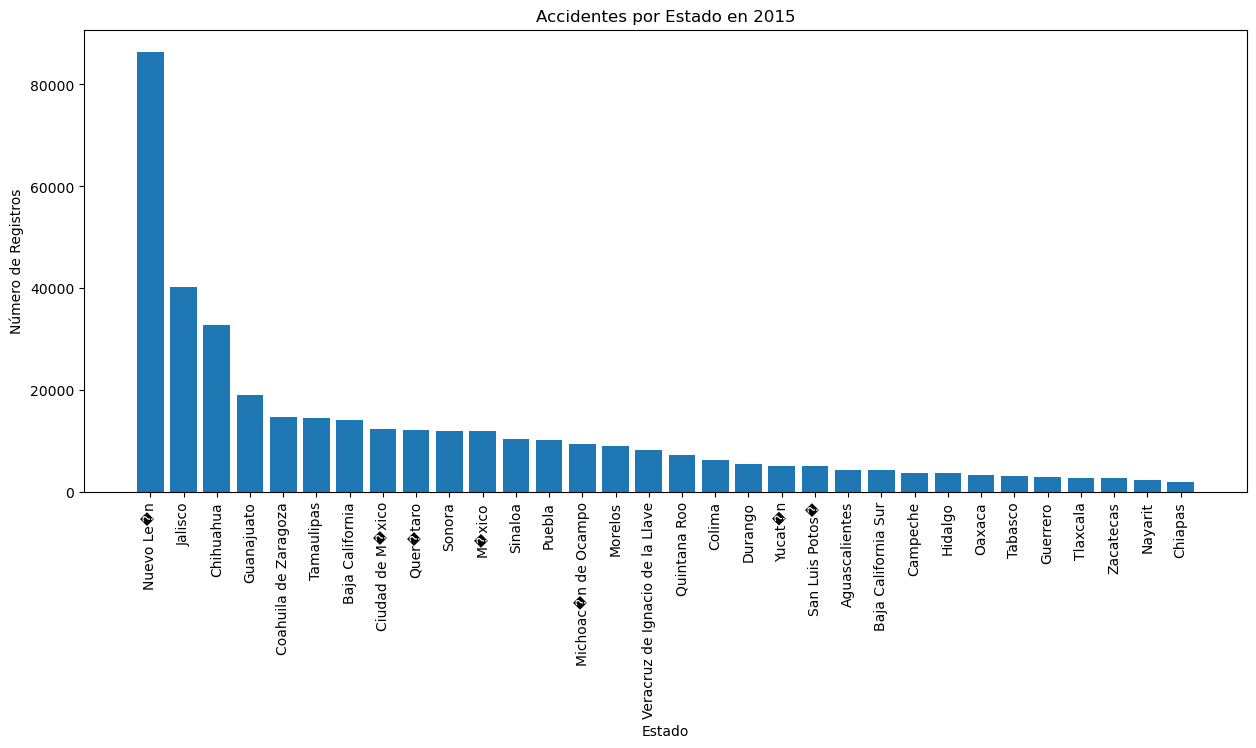

In [37]:
#Accidentes por Estado en 2015
print(nombre)

sqlstr = """ 
select YEAR(FECHA) anio, e.NOM_ENT estado, count(*) nr
from atus a
left join estados e
on(a.ID_ENTIDAD = e.CVE_ENT)
where(YEAR(FECHA) = 2015)
group by e.NOM_ENT, YEAR(FECHA)
order by nr desc
"""

dfh = spark.sql(sqlstr).toPandas()

plt.figure(figsize=(15,6))
plt.bar(dfh['estado'], dfh['nr'])

plt.xlabel('Estado')
plt.ylabel('Número de Registros')
plt.title('Accidentes por Estado en 2015')
plt.xticks(rotation = 90)

print("""En esta gráfica se observa que los accidentes en 2015 ocurrieron principalmente en Nuevo León, siendo tantos que duplican la cantidad de accidentes
ocurridos en jalisco en le mismo periodo de tiempo. La Ciudad de México se encuentra en el top 8 de las entidades con más accidentes con aproximadamente
15,000 accidentes.\n""") 

Madrigal Urencio Ricardo 

En esta gráfica se observa como los accidentes suelen ocurrir a la media noche, a las 8:00 am, a las 4:00pm y a las 7:00pm
Lo cual coincide con las horas de entrada a los trabajos y las horas de salida de los trabajos. Los accidentes a media noche se pueden explicar
como accidentes que ocurren despues de fiestas cuando los conductores no están aptos para manejar. 



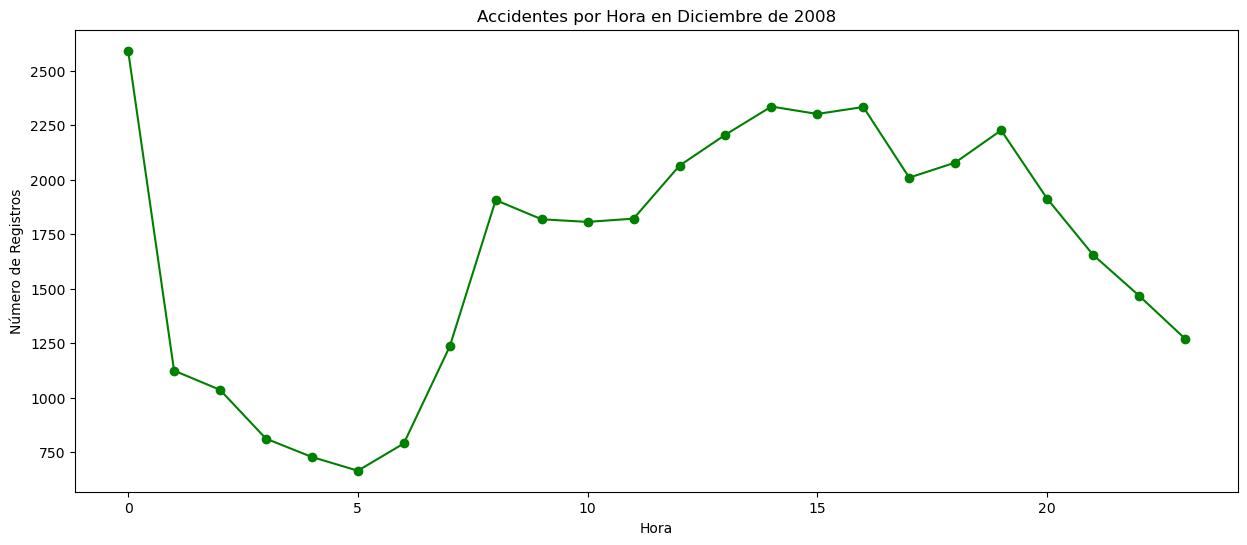

In [38]:
#2
print(nombre)

sqlstr = """ 
select HOUR(HORA) Hora, YEAR(FECHA) anio, MONTH(FECHA) mes, count(*) nr 
from atus
where(anio = '2008' and mes = '12')
group by HOUR(HORA), YEAR(FECHA), MONTH(FECHA)
order by 1
"""


dfh = spark.sql(sqlstr).toPandas()

plt.figure(figsize=(15,6))
plt.plot(dfh['Hora'], dfh['nr'], marker='o', linestyle='-', color='g')

plt.xlabel('Hora')
plt.ylabel('Número de Registros')
plt.title('Accidentes por Hora en Diciembre de 2008')

print("""En esta gráfica se observa como los accidentes suelen ocurrir a la media noche, a las 8:00 am, a las 4:00pm y a las 7:00pm
Lo cual coincide con las horas de entrada a los trabajos y las horas de salida de los trabajos. Los accidentes a media noche se pueden explicar
como accidentes que ocurren despues de fiestas cuando los conductores no están aptos para manejar. \n""")

Madrigal Urencio Ricardo 

En esta gráfica se observa como los accidentes en zonas urbanas ocurren principalmente en intersecciones 



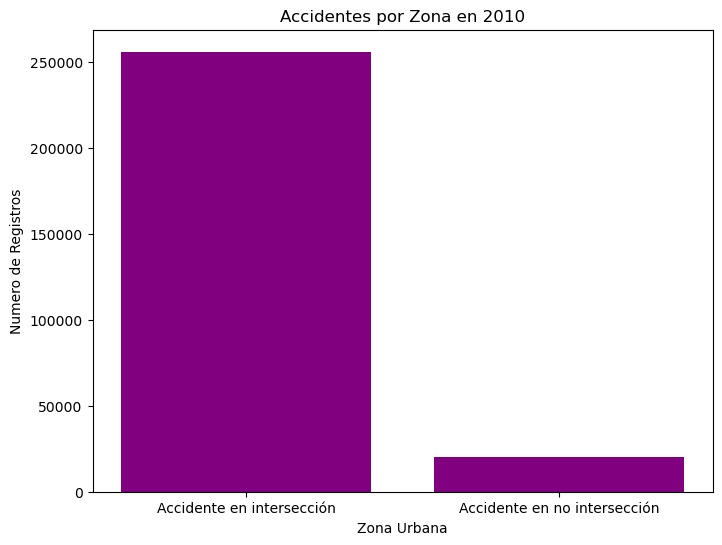

In [39]:
#Accidentes por Zona en 2010
print(nombre)

sqlstr = """ 
select YEAR(FECHA) anio, URBANA, count(*) nr
from atus
where not (URBANA = "Sin accidente en esta zona")
and(anio = 2020)
group by URBANA, YEAR(FECHA)
order by nr desc
"""

dfh = spark.sql(sqlstr).toPandas()

plt.figure(figsize=(8,6))
plt.bar(dfh['URBANA'], dfh['nr'],  color='purple')

plt.xlabel('Zona Urbana')
plt.ylabel('Numero de Registros')
plt.title('Accidentes por Zona en 2010')

print("En esta gráfica se observa como los accidentes en zonas urbanas ocurren principalmente en intersecciones \n")

Madrigal Urencio Ricardo 

En esta gráfica se observa como en las zonas rurales los accidentes se concentran en autopistas o carreteras estatales. 



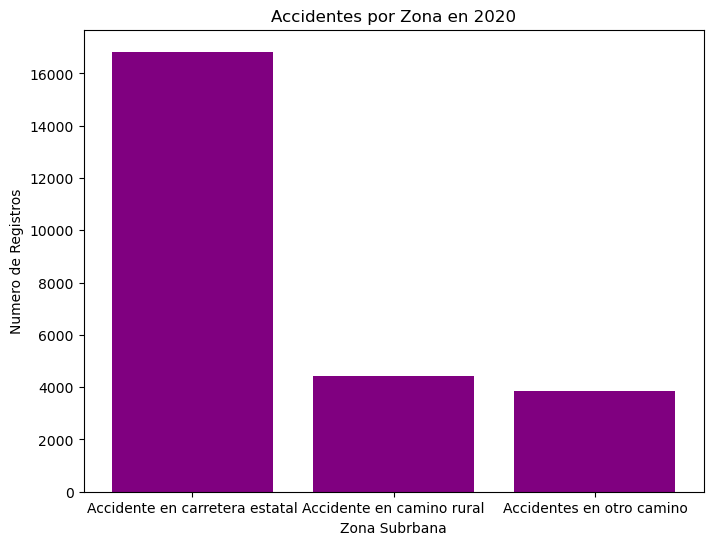

In [40]:
#Accidentes por Zona en 2010
print(nombre)

sqlstr = """ 
select YEAR(FECHA) anio, SUBURBANA, count(*) nr
from atus
where not(SUBURBANA = "Sin accidente en esta zona")
and(anio = 2020)
group by SUBURBANA, YEAR(FECHA)
order by nr desc
"""

dfh = spark.sql(sqlstr).toPandas()

plt.figure(figsize=(8,6))
plt.bar(dfh['SUBURBANA'], dfh['nr'], color='purple')

plt.xlabel('Zona Subrbana')
plt.ylabel('Numero de Registros')
plt.title('Accidentes por Zona en 2020')

print("En esta gráfica se observa como en las zonas rurales los accidentes se concentran en autopistas o carreteras estatales. \n")

Madrigal Urencio Ricardo 

En esta gráfica podemos observar casos con 0 y 99 años los cuales podemos considerar como ruido
ya que rompen con el esquema al ser registros bastante altos en comparcaión con la media.
Considerando eso podemos observar que  en los accidentes se ven involucradas principalmente personas de 18 añosm seguido de personas de 20
y finalmente de 25, 28 y 30 años. despues la frecuencia de involucrados disminuye según aumenta la edad. 
 


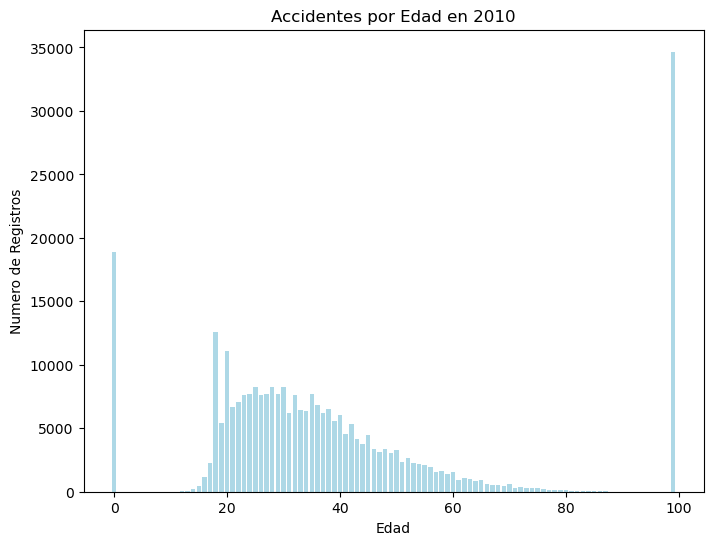

In [41]:
#Accidentes por Edad
print(nombre)

sqlstr = """ 
select YEAR(FECHA) anio, ID_EDAD Edad, TIPACCID Tipo_Accidente, count(*) nr
from atus
where(anio = '2010')
group by TIPACCID, ID_EDAD, YEAR(FECHA)
order by nr desc
"""

dfh = spark.sql(sqlstr).toPandas()

plt.figure(figsize=(8,6))
plt.bar(dfh['Edad'], dfh['nr'], color='lightblue')

plt.xlabel('Edad')
plt.ylabel('Numero de Registros')
plt.title('Accidentes por Edad en 2010')
print("""En esta gráfica podemos observar casos con 0 y 99 años los cuales podemos considerar como ruido
ya que rompen con el esquema al ser registros bastante altos en comparcaión con la media.
Considerando eso podemos observar que  en los accidentes se ven involucradas principalmente personas de 18 añosm seguido de personas de 20
y finalmente de 25, 28 y 30 años. despues la frecuencia de involucrados disminuye según aumenta la edad. \n """)

Madrigal Urencio Ricardo 

En esta grafica podemos observar como los hombres estuvieron involucrados en la mayoría de accidentes en 2012,
Seguido por individuos que se dieron a la fuga en aproximadamente 50,000 casos.
Las mujeres son las que se vieron involucradas en menos accidenes durante el año con poco menos de 50,000 casos. 



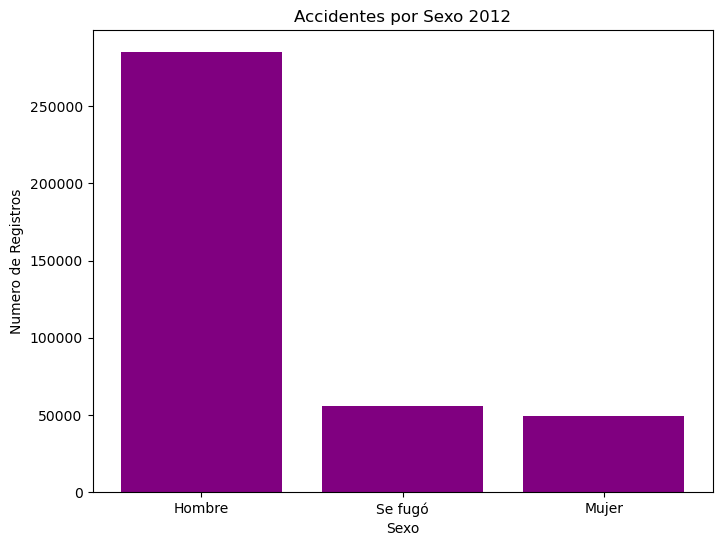

In [42]:
#Accidenttes por Sexo en 2012
print(nombre)

sqlstr = """ 
select YEAR(FECHA) anio, SEXO, count(*) nr
from atus
where (anio = '2012')
group by SEXO, YEAR(FECHA)
order by nr desc
"""

dfh = spark.sql(sqlstr).toPandas()

plt.figure(figsize=(8,6))
plt.bar(dfh['SEXO'], dfh['nr'], color='purple')

plt.xlabel('Sexo')
plt.ylabel('Numero de Registros')
plt.title('Accidentes por Sexo 2012')

print("""En esta grafica podemos observar como los hombres estuvieron involucrados en la mayoría de accidentes en 2012,
Seguido por individuos que se dieron a la fuga en aproximadamente 50,000 casos.
Las mujeres son las que se vieron involucradas en menos accidenes durante el año con poco menos de 50,000 casos. \n""")